In [ ]:
import pandas as pd

import numpy as np

from prophet import Prophet

import matplotlib.pyplot as plt

import pickle

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

In [ ]:
# Load the dataset (assuming it's a CSV file)

df = pd.read_csv('/content/drive/MyDrive/Pharmacy.csv')

In [ ]:
# Drop unnecessary columns and remove null values

df = df[['Dateofbill', 'Quantity', 'DrugName']].dropna()

In [ ]:
# Convert Dateofbill column to datetime format

df['Dateofbill'] = pd.to_datetime(df['Dateofbill'])


In [ ]:
# Group by DrugName and calculate total Quantity sold

drug_quantities = df.groupby('DrugName')['Quantity'].sum().reset_index()

In [ ]:
# Get the top 20 most sold drugs by quantity

top_20_drugs = drug_quantities.nlargest(20, 'Quantity')['DrugName'].tolist()

print(top_20_drugs)


['SODIUM CHLORIDE IVF 100ML', 'SEVOFLURANE 99.97%', 'SODIUM CHLORIDE 0.9%', 'ONDANSETRON 2MG/ML', 'MULTIPLE ELECTROLYTES 500ML IVF', 'WATER FOR INJECTION 10ML SOLUTION', 'LEVOSALBUTAMOL/LEVALBUTEROL 0.63MG RESPULES', 'PANTOPRAZOLE 40MG INJ', 'PARACETAMOL 1GM IV INJ', 'NORADRENALINE 2ML INJ', 'PIPERACILLIN 4GM+ TAZOBACTAM 500MG', 'ATRACURIUM BESYLATE 25MG/2.5ML', 'SEVOFLURANE', 'POTASSIUM CHLORIDE 150MG', 'MEROPENEM 1GM INJ', 'ADRENALINE INJ 1ML', 'SALBUTAMOL 2.5MG', 'LIGNOCAINE HYDROCHLORIDE 2% INJ', 'PARACETAMOL 150MG', 'CEFTRIAXONE 1GM']


In [ ]:
# Feature extraction for clustering

drug_features = df[df['DrugName'].isin(top_20_drugs)].groupby('DrugName').agg(

    mean_quantity=('Quantity', 'mean'),

    std_quantity=('Quantity', 'std'),

    total_quantity=('Quantity', 'sum')

).reset_index()

In [ ]:
# Clustering with KMeans

best_silhouette = 1  # Initialize with a high value

best_n_clusters = 2  # Initialize with an arbitrary number

for n_clusters in range(2, len(top_20_drugs)):  # Iterate through cluster numbers

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    labels = kmeans.fit_predict(drug_features[['mean_quantity', 'std_quantity', 'total_quantity']])

    silhouette_avg = silhouette_score(drug_features[['mean_quantity', 'std_quantity', 'total_quantity']], labels)

    if silhouette_avg < best_silhouette:

        best_silhouette = silhouette_avg

        best_n_clusters = n_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
# Apply the best KMeans model

kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)

labels = kmeans.fit_predict(drug_features[['mean_quantity', 'std_quantity', 'total_quantity']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Print clustering results

print("Number of clusters:", best_n_clusters)

print("Silhouette score:", best_silhouette)

Number of clusters: 19
Silhouette score: 0.09065661937219986


In [ ]:
# Analyze cluster composition

for i in range(best_n_clusters):

    cluster_drugs = drug_features[labels == i]['DrugName'].tolist()

    print(f"Cluster {i+1}: {len(cluster_drugs)} drugs - {cluster_drugs}")

Cluster 1: 1 drugs - ['MULTIPLE ELECTROLYTES 500ML IVF']
Cluster 2: 1 drugs - ['POTASSIUM CHLORIDE 150MG']
Cluster 3: 2 drugs - ['PANTOPRAZOLE 40MG INJ', 'PARACETAMOL 1GM IV INJ']
Cluster 4: 1 drugs - ['SODIUM CHLORIDE IVF 100ML']
Cluster 5: 1 drugs - ['SALBUTAMOL 2.5MG']
Cluster 6: 1 drugs - ['ATRACURIUM BESYLATE 25MG/2.5ML']
Cluster 7: 1 drugs - ['SEVOFLURANE']
Cluster 8: 1 drugs - ['SEVOFLURANE 99.97%']
Cluster 9: 1 drugs - ['WATER FOR INJECTION 10ML SOLUTION']
Cluster 10: 1 drugs - ['CEFTRIAXONE 1GM']
Cluster 11: 1 drugs - ['ADRENALINE INJ 1ML']
Cluster 12: 1 drugs - ['SODIUM CHLORIDE 0.9%']
Cluster 13: 1 drugs - ['MEROPENEM 1GM INJ']
Cluster 14: 1 drugs - ['NORADRENALINE 2ML INJ']
Cluster 15: 1 drugs - ['ONDANSETRON 2MG/ML']
Cluster 16: 1 drugs - ['LIGNOCAINE HYDROCHLORIDE 2% INJ']
Cluster 17: 1 drugs - ['PARACETAMOL 150MG']
Cluster 18: 1 drugs - ['LEVOSALBUTAMOL/LEVALBUTEROL 0.63MG RESPULES']
Cluster 19: 1 drugs - ['PIPERACILLIN 4GM+ TAZOBACTAM 500MG']


In [ ]:
# Model building and evaluation

models = {}

mape_scores = {}

Building model for Cluster 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplle23srt/ayw5hgfh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplle23srt/e8fv3dzp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49037', 'data', 'file=/tmp/tmplle23srt/ayw5hgfh.json', 'init=/tmp/tmplle23srt/e8fv3dzp.json', 'output', 'file=/tmp/tmplle23srt/prophet_modelmwuikqs0/prophet_model-20240528042703.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:27:03 - cmdstanpy - INFO - Chain [1] start processing
IN

Cluster 1 MAPE: nan

Building model for Cluster 2
Cluster 2 MAPE: nan

Building model for Cluster 3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplle23srt/y4jwp0u3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplle23srt/64o0mo_a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80999', 'data', 'file=/tmp/tmplle23srt/y4jwp0u3.json', 'init=/tmp/tmplle23srt/64o0mo_a.json', 'output', 'file=/tmp/tmplle23srt/prophet_modeld28exdk7/prophet_model-20240528042704.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:27:04 - cmdstanpy - INFO - Chain [1] start processing
IN

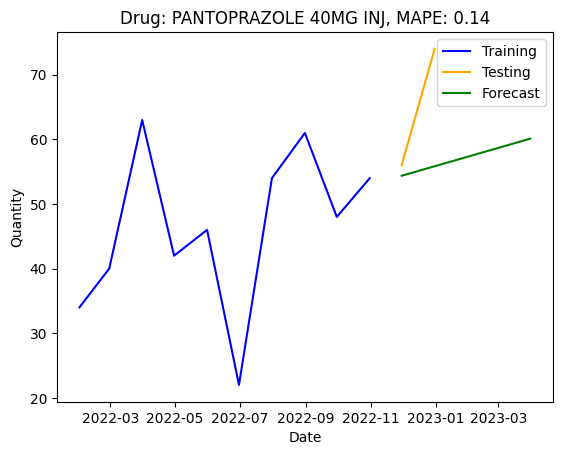

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplle23srt/zei3xls9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplle23srt/bie3h8ve.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89459', 'data', 'file=/tmp/tmplle23srt/zei3xls9.json', 'init=/tmp/tmplle23srt/bie3h8ve.json', 'output', 'file=/tmp/tmplle23srt/prophet_modelj1vxriyq/prophet_model-20240528042704.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:27:04 - cmdstanpy - INFO - Chain [1] start processing
IN

Cluster 3 MAPE: 0.14

Building model for Cluster 4
Cluster 4 MAPE: 0.14

Building model for Cluster 5


INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplle23srt/nvoszisa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplle23srt/0_cebg4c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92068', 'data', 'file=/tmp/tmplle23srt/nvoszisa.json', 'init=/tmp/tmplle23srt/0_cebg4c.json', 'output', 'file=/tmp/tmplle23srt/prophet_modelf60d6fp5/prophet_model-20240528042704.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:27:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:27:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekl

Cluster 5 MAPE: 0.14

Building model for Cluster 6
Cluster 6 MAPE: 0.14

Building model for Cluster 7


INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplle23srt/t43824ol.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplle23srt/aovw6he0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6616', 'data', 'file=/tmp/tmplle23srt/t43824ol.json', 'init=/tmp/tmplle23srt/aovw6he0.json', 'output', 'file=/tmp/tmplle23srt/prophet_modelljxcmd39/prophet_model-20240528042705.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:27:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:27:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly

Cluster 7 MAPE: 0.14

Building model for Cluster 8
Cluster 8 MAPE: 0.14

Building model for Cluster 9


INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplle23srt/dbujb00n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplle23srt/fxyvxtuv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17999', 'data', 'file=/tmp/tmplle23srt/dbujb00n.json', 'init=/tmp/tmplle23srt/fxyvxtuv.json', 'output', 'file=/tmp/tmplle23srt/prophet_modelowadrhl1/prophet_model-20240528042705.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:27:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:27:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekl

Cluster 9 MAPE: 0.14

Building model for Cluster 10


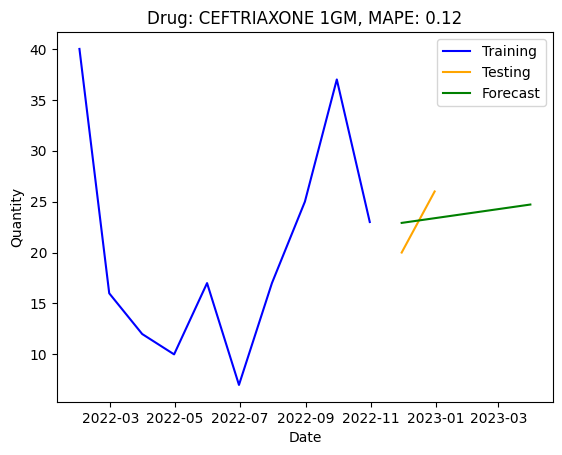

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplle23srt/8r7vr8qf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplle23srt/pllr52c1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71879', 'data', 'file=/tmp/tmplle23srt/8r7vr8qf.json', 'init=/tmp/tmplle23srt/pllr52c1.json', 'output', 'file=/tmp/tmplle23srt/prophet_model24diihup/prophet_model-20240528042706.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:27:06 - cmdstanpy - INFO - Chain [1] start processing
IN

Cluster 10 MAPE: 0.13

Building model for Cluster 11
Cluster 11 MAPE: 0.13

Building model for Cluster 12


INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplle23srt/b2srnyuy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplle23srt/9if5iz6o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14421', 'data', 'file=/tmp/tmplle23srt/b2srnyuy.json', 'init=/tmp/tmplle23srt/9if5iz6o.json', 'output', 'file=/tmp/tmplle23srt/prophet_modelf03fv3x3/prophet_model-20240528042706.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:27:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:27:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekl

Cluster 12 MAPE: 0.13

Building model for Cluster 13
Cluster 13 MAPE: 0.13

Building model for Cluster 14


INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplle23srt/0ghzjbfr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplle23srt/m81gz3gp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49657', 'data', 'file=/tmp/tmplle23srt/0ghzjbfr.json', 'init=/tmp/tmplle23srt/m81gz3gp.json', 'output', 'file=/tmp/tmplle23srt/prophet_model5unx7lvq/prophet_model-20240528042707.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:27:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:27:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekl

Cluster 14 MAPE: 0.13

Building model for Cluster 15
Cluster 15 MAPE: 0.13

Building model for Cluster 16


INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplle23srt/_pj_n_d7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplle23srt/d6h5vp9o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88389', 'data', 'file=/tmp/tmplle23srt/_pj_n_d7.json', 'init=/tmp/tmplle23srt/d6h5vp9o.json', 'output', 'file=/tmp/tmplle23srt/prophet_modeld5ghc43s/prophet_model-20240528042707.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:27:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:27:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


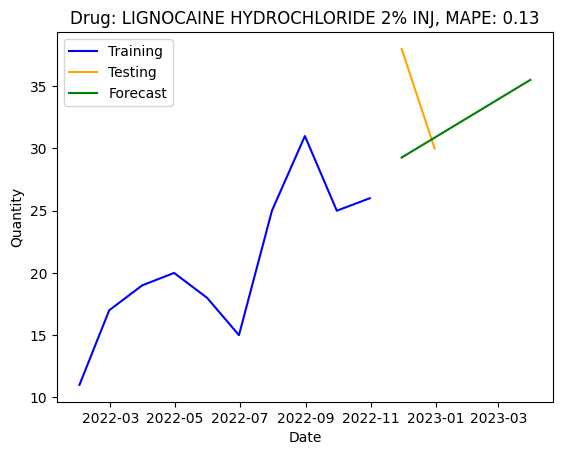

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplle23srt/e3j0vixb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplle23srt/pa7ttvfs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6562', 'data', 'file=/tmp/tmplle23srt/e3j0vixb.json', 'init=/tmp/tmplle23srt/pa7ttvfs.json', 'output', 'file=/tmp/tmplle23srt/prophet_modelkhinwq3a/prophet_model-20240528042707.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:27:07 - cmdstanpy - INFO - Chain [1] start processing
INF

Cluster 16 MAPE: 0.13

Building model for Cluster 17


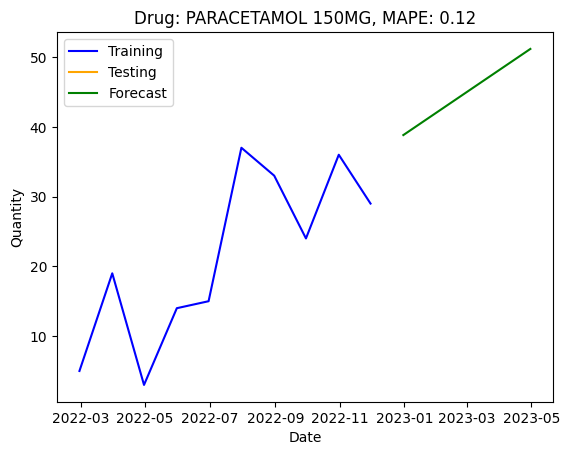

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplle23srt/w_oq5eh0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplle23srt/z5dip3qd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12044', 'data', 'file=/tmp/tmplle23srt/w_oq5eh0.json', 'init=/tmp/tmplle23srt/z5dip3qd.json', 'output', 'file=/tmp/tmplle23srt/prophet_model561o1tse/prophet_model-20240528042708.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:27:08 - cmdstanpy - INFO - Chain [1] start processing
IN

Cluster 17 MAPE: 0.13

Building model for Cluster 18


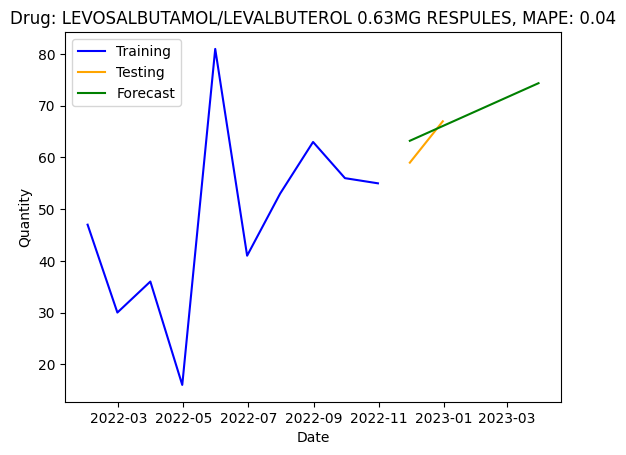

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplle23srt/2i0gdihx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplle23srt/5togfk20.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68126', 'data', 'file=/tmp/tmplle23srt/2i0gdihx.json', 'init=/tmp/tmplle23srt/5togfk20.json', 'output', 'file=/tmp/tmplle23srt/prophet_modeluwjgc9oc/prophet_model-20240528042708.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:27:08 - cmdstanpy - INFO - Chain [1] start processing
IN

Cluster 18 MAPE: 0.11

Building model for Cluster 19
Cluster 19 MAPE: 0.11



In [ ]:
for cluster_id in range(best_n_clusters):

    cluster_drugs = drug_features[labels == cluster_id]['DrugName'].tolist()

    print(f"Building model for Cluster {cluster_id + 1}")


    for drug in cluster_drugs:

        drug_df = df[df['DrugName'] == drug]


        # Resample to monthly frequency

        drug_df = drug_df.resample('M', on='Dateofbill')['Quantity'].sum().reset_index()


        # Split into training and testing sets (10 months for training, 2 months for testing)

        train_df = drug_df[:10]

        test_df = drug_df[10:12]


        # Create a Prophet model with adjusted hyperparameters

        model = Prophet(

            growth='linear',

            seasonality_mode='multiplicative',

            seasonality_prior_scale=10,

            holidays_prior_scale=20

        )


        # Fit the model to the training data

        model.fit(train_df.rename(columns={'Dateofbill': 'ds', 'Quantity': 'y'}))


        # Make predictions on the testing data

        future = model.make_future_dataframe(periods=5, freq='M')

        forecast = model.predict(future)


        # Calculate MAPE score

        y_true = test_df['Quantity']

        y_pred = forecast['yhat'][-5:]

        mape = np.mean(np.abs((y_true - y_pred) / y_true))


        if mape < 0.2:  # Only save models with MAPE < 0.2

            mape_scores[drug] = mape

            models[drug] = model


            # Plot the forecast

            plt.plot(train_df['Dateofbill'], train_df['Quantity'], label='Training', color='blue')

            plt.plot(test_df['Dateofbill'], test_df['Quantity'], label='Testing', color='orange')

            plt.plot(forecast['ds'][-5:], forecast['yhat'][-5:], label='Forecast', color='green')

            plt.title(f'Drug: {drug}, MAPE: {mape:.2f}')

            plt.xlabel('Date')

            plt.ylabel('Quantity')

            plt.legend()

            plt.show()


    # Evaluate the models for the cluster

    cluster_mape = np.mean(list(mape_scores.values()))

    print(f"Cluster {cluster_id + 1} MAPE: {cluster_mape:.2f}")

    print("")

In [ ]:
# Overall evaluation

overall_mape = np.mean(list(mape_scores.values()))

print(f"Overall MAPE: {overall_mape:.2f}")

print(f"Number of models: {len(models)}")

Overall MAPE: 0.11
Number of models: 5


In [ ]:
# Save all models to a single file
with open('all_models.pkl', 'wb') as f:
    pickle.dump(models, f)
print("All models saved to all_models.pkl")

All models saved to all_models.pkl
